In [14]:
from aestheval.data.datasets import PCCD
import torch
SPLITS = ('train', 'validation', 'test')

pccd_dataset = [PCCD(split, dataset_path= "/media/data-storage/datasets/PCCD",load_images=False) for split in SPLITS]

In [15]:
dataset = torch.utils.data.ConcatDataset(pccd_dataset)

In [16]:
dataset[0]

(tensor([[[0.2784, 0.2667, 0.2667,  ..., 0.3255, 0.3255, 0.3216],
          [0.2784, 0.2706, 0.2706,  ..., 0.3333, 0.3294, 0.3294],
          [0.2784, 0.2745, 0.2784,  ..., 0.3294, 0.3255, 0.3255],
          ...,
          [0.3098, 0.3137, 0.3137,  ..., 0.1412, 0.1373, 0.1373],
          [0.3098, 0.3059, 0.3059,  ..., 0.1451, 0.1412, 0.1373],
          [0.3020, 0.3020, 0.2980,  ..., 0.1529, 0.1490, 0.1451]],
 
         [[0.2863, 0.2745, 0.2745,  ..., 0.3216, 0.3216, 0.3176],
          [0.2863, 0.2784, 0.2784,  ..., 0.3294, 0.3255, 0.3255],
          [0.2784, 0.2745, 0.2784,  ..., 0.3255, 0.3216, 0.3216],
          ...,
          [0.3569, 0.3608, 0.3608,  ..., 0.2431, 0.2392, 0.2392],
          [0.3647, 0.3608, 0.3569,  ..., 0.2471, 0.2431, 0.2392],
          [0.3647, 0.3647, 0.3608,  ..., 0.2549, 0.2510, 0.2471]],
 
         [[0.2824, 0.2706, 0.2706,  ..., 0.3059, 0.3059, 0.3020],
          [0.2824, 0.2745, 0.2745,  ..., 0.3137, 0.3098, 0.3098],
          [0.2784, 0.2745, 0.2784,  ...,

In [4]:
len(dataset)

4235

In [5]:
keys = dataset.datasets[0].attributes
keys

['general_impression',
 'subject_of_photo',
 'composition',
 'use_of_camera',
 'depth_of_field',
 'color_lighting',
 'focus']

In [8]:
ncomments=[]
nwords = []
for im, d in dataset:
    # print(d)
    comments = [d[k] for k in keys if d[k]]
    ncomments.append(len(comments))
    nwords.extend([len(x.split()) for x in comments])
import pandas as pd
pd.Series(ncomments).describe()

count    4235.000000
mean        6.628099
std         0.647523
min         4.000000
25%         6.000000
50%         7.000000
75%         7.000000
max         7.000000
dtype: float64

In [10]:
pd.Series(nwords).describe()

count    28070.000000
mean        41.097186
std         41.656863
min          1.000000
25%         14.000000
50%         30.000000
75%         55.000000
max        780.000000
dtype: float64

In [11]:
import statistics as st
from tqdm import tqdm 

def compute_mean(list_of_scores):
    good_scores = []
    for i in list_of_scores:
        try:
            good_scores.append(int(i))
        except:
            continue
    return st.mean(good_scores)

gt_scores, pred_scores = zip(*[(compute_mean(data['score']), data['mean_score']) for _, data in tqdm(dataset)])



100%|██████████| 4235/4235 [00:00<00:00, 95018.63it/s]


In [12]:
from scipy import stats
import sklearn.metrics as sm

srcc = stats.spearmanr(gt_scores, pred_scores)
print("SRCC =", srcc)
mse = round(sm.mean_squared_error(gt_scores, [score*10 for score in pred_scores]), 4)
print("MSE =", mse)
lcc = stats.pearsonr(gt_scores, pred_scores)
print("LCC =", lcc)

SRCC = SpearmanrResult(correlation=0.6223100129217211, pvalue=0.0)
MSE = 1.5729
LCC = (0.6499357318742438, 0.0)


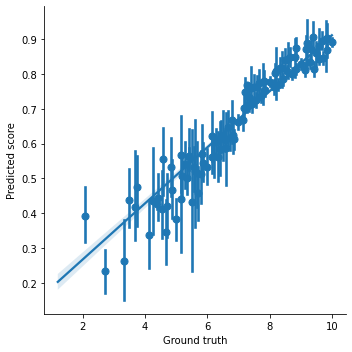

In [13]:
import pandas as pd
df = pd.DataFrame({
    "Ground truth": gt_scores,
    "Predicted score": pred_scores
    })
import seaborn as sns
ax = sns.lmplot(x="Ground truth", y="Predicted score", data=df, x_bins=1000)


<AxesSubplot:ylabel='Frequency'>

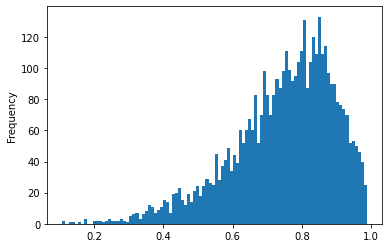

In [14]:
import pandas as pd
pd.Series([data['mean_score'] for _, data in dataset]).plot(kind='hist', bins=100)
